<a href="https://colab.research.google.com/github/Petegichana/Machine-Learning-Algorithms/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import re #regular expressions/patterns
import tweepy #allows devs integrate your py projects with twitter
from tweepy import OAuthHandler
from textblob import TextBlob #used to understand text(is it a posive/negative tweet)


In [11]:
#function based approach
#cleaning tweets 
def clean_tweet(tweet):
           '''
           Utility function to clean tweet text by removing links, special characters
           using simple regex statements.
           '''
           return ' '.join(re.sub("RT @:(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [12]:
#cheching for tweet polarity
#polarity>0 means its positive to the hash tag
#polarity<0 means its negative to the hash tag
#polarity=0 means the tweet is neutral

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [13]:
#Twitter authentication
#consumer_key, consumer_secret, access-token, access-token-secret

def get_tweets(query, count):
        '''
        Main function to fetch tweets and parse them.
        '''
        tweets = []
        # call twitter api to fetch tweets
        # consumer_key = 'L6Of6zefLv5mpKaBHDV0NDvcc'
        # consumer_secret = '3uRcoYoVP0YPi26RXJ3UOj4aSQLr6VCbeRcTWMOAxbnHV4gCwR'
        # access_token = '297976287-gS57FevcLTRkbtIjd88YpPi9f3LnrscPh4ErYZzX'
        # access_token_secret = 'q9V1RjR1A6iZaLA3s6qWX4sLV87DkouMPk89QlFLscvxu'

        
        consumer_key = 'OPbn9IwgI3lDY2k69c5Fpxwll'
        consumer_secret = 'pxqJup6g9spj6mqVJbzJEDvZ7R1hnpPrSDkqUK0dF790O9Vse1'
        access_token = '297976287-Hq3f0ligYw3qcQi8UWx5rSPlkL6rfOUqdvvtnBPH'
        access_token_secret = 'vQOLGPY258U9ZOKwvVR9v2fwDs8P2LGWjaMjpvhTDcsgT'

        # attempt authentication
        # create OAuthHandler object
        auth = OAuthHandler(consumer_key, consumer_secret)
        # set access token and secret
        auth.set_access_token(access_token, access_token_secret)
        # create tweepy API object to fetch tweets
        api = tweepy.API(auth, wait_on_rate_limit=True)
        #fetched_tweets = api.search_30_day(q = query, count = count, fromDate="202011100000", toDate="202211300000", label = "Cool")
        fetched_tweets = tweepy.Cursor(api.search, q=query).items(count)
        #fetched_tweets = api.user_timeline(screen_name=query)
        # parsing tweets one by one
        for tweet in fetched_tweets:
            # empty dictionary to store required params of a tweet
            parsed_tweet = {}

            # saving text of tweet
            parsed_tweet['text'] = tweet.text
            # saving sentiment of tweet
            parsed_tweet['sentiment'] = get_tweet_sentiment(tweet.text)

            # appending parsed tweet to tweets list
            if tweet.retweet_count > 0:
                # if tweet has retweets, ensure that it is appended only once
                if parsed_tweet not in tweets:
                    tweets.append(parsed_tweet)
            else:
                tweets.append(parsed_tweet)

        # return parsed tweets
        return tweets

In [24]:
#getting tweets based on hashtag
tweets = get_tweets(query = "#KOT", count = 20)

#positive tweets
ptweets = []
for tweet in tweets:
  if tweet['sentiment']=='positive':
    ptweets.append(tweet)

print('Positive tweeteś percentage: {}'.format(100*len(ptweets)/ len(tweets)))

#negative tweets
ntweets = []
for tweet in tweets:
  if tweet['sentiment']=='negative':
    ntweets.append(tweet)

print('Negative tweeteś percentage: {}'.format(100*len(ntweets)/ len(tweets)))

#neutral tweets
dtweets = []
for tweet in tweets:
  if tweet['sentiment']=='neutral':
    dtweets.append(tweet)

print('Neutral tweeteś percentage: {}'.format(100*len(dtweets)/ len(tweets)))

Positive tweeteś percentage: 33.333333333333336
Negative tweeteś percentage: 16.666666666666668
Neutral tweeteś percentage: 50.0


In [25]:
#getting positive texts on a wordcloud
positive_text = []
for text in ptweets[:50]:
  positive_text.append(tweet['text'])


print(positive_text) 

['Wakenya #KOT wakiona hii tumekwisha https://t.co/x7zAFtc7Bn', 'Wakenya #KOT wakiona hii tumekwisha https://t.co/x7zAFtc7Bn', 'Wakenya #KOT wakiona hii tumekwisha https://t.co/x7zAFtc7Bn', 'Wakenya #KOT wakiona hii tumekwisha https://t.co/x7zAFtc7Bn', 'Wakenya #KOT wakiona hii tumekwisha https://t.co/x7zAFtc7Bn', 'Wakenya #KOT wakiona hii tumekwisha https://t.co/x7zAFtc7Bn']


In [26]:
#wordcloud for positive
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
#Function to Create Wordcloud
def create_wordcloud(text):
        stopwords = set(STOPWORDS)
        wc = WordCloud(background_color="white",
        max_words=3000,
        stopwords=stopwords,repeat=True)
        wc.generate(str(text))
        wc.to_file("wc.png")
        print("Word Cloud Saved Successfully")
        path="wc.png"
        display(Image.open(path))

Word Cloud Saved Successfully


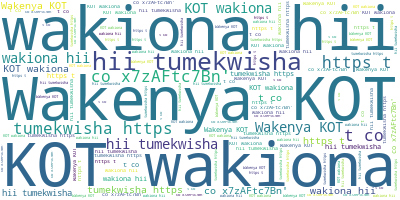

In [29]:
create_wordcloud(positive_text)